# Titanic Case Study with PyCaret

In [ ]:
# using - Gradient Boosting Classifier

In [8]:
import pandas as pd
import numpy as np

In [9]:
train = pd.read_csv('train.csv')
#test = pd.read_csv('test.csv')

In [42]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
data = train.sample(frac=0.95, random_state=786)
data_unseen = train.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (846, 12)
Unseen Data For Predictions: (45, 12)


In [14]:
from pycaret.classification import *

In [17]:
exp_clf101 = setup(data = data, target = 'Survived', session_id=123)

,Description,Value
0,session_id,123
1,Target,Survived
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(846, 12)"
5,Missing Values,True
6,Numeric Features,3
7,Categorical Features,8
8,Ordinal Features,False
9,High Cardinality Features,False


In [18]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8244,0.8699,0.6649,0.8658,0.7486,0.6187,0.6336,0.1000
rf,Random Forest Classifier,0.8176,0.8605,0.7105,0.8191,0.7539,0.6111,0.6208,0.1900
ridge,Ridge Classifier,0.8160,0.0000,0.7319,0.7975,0.7599,0.6115,0.6162,0.0130
et,Extra Trees Classifier,0.8158,0.8537,0.7058,0.8110,0.7469,0.6053,0.6140,0.1840
ada,Ada Boost Classifier,0.8142,0.8589,0.7237,0.7982,0.7572,0.6076,0.6112,0.0440
lightgbm,Light Gradient Boosting Machine,0.8057,0.8490,0.6946,0.7984,0.7404,0.5870,0.5925,0.0990
lr,Logistic Regression,0.8007,0.8629,0.7236,0.7743,0.7439,0.5814,0.5863,0.5970
dt,Decision Tree Classifier,0.7956,0.7818,0.7112,0.7677,0.7339,0.5691,0.5739,0.0110
lda,Linear Discriminant Analysis,0.7130,0.7532,0.6567,0.6421,0.6441,0.4047,0.4088,0.0670
knn,K Neighbors Classifier,0.6081,0.5897,0.3594,0.5191,0.4216,0.1420,0.1481,0.0630


In [19]:
print(best_model)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [21]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [43]:
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8000,0.8466,0.5833,0.8750,0.7000,0.5588,0.5847
1,0.8000,0.8322,0.5833,0.8750,0.7000,0.5588,0.5847
2,0.7797,0.8225,0.5652,0.8125,0.6667,0.5099,0.5286
3,0.6949,0.7327,0.5000,0.6667,0.5714,0.3420,0.3505
4,0.8814,0.9018,0.8333,0.8696,0.8511,0.7525,0.7530
5,0.7458,0.8024,0.5000,0.8000,0.6154,0.4402,0.4674
6,0.9153,0.9690,0.8333,0.9524,0.8889,0.8209,0.8257
7,0.8475,0.9488,0.7500,0.8571,0.8000,0.6776,0.6815
8,0.8814,0.9214,0.7083,1.0000,0.8293,0.7424,0.7683
9,0.8983,0.9220,0.7917,0.9500,0.8636,0.7836,0.7919


In [45]:
#trained model object is stored in the variable 'gbc'. 
print(gbc)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [46]:
tuned_gbc = tune_model(gbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8167,0.8848,0.6667,0.8421,0.7442,0.6043,0.6143
1,0.7667,0.7743,0.5833,0.7778,0.6667,0.4928,0.5048
2,0.8136,0.8502,0.6087,0.8750,0.7179,0.5853,0.6068
3,0.7288,0.7292,0.6667,0.6667,0.6667,0.4381,0.4381
4,0.7966,0.8833,0.7917,0.7308,0.7600,0.5840,0.5854
5,0.7627,0.7946,0.5833,0.7778,0.6667,0.4882,0.5004
6,0.8983,0.9643,0.9167,0.8462,0.8800,0.7920,0.7939
7,0.8305,0.9256,0.7917,0.7917,0.7917,0.6488,0.6488
8,0.8644,0.9345,0.7917,0.8636,0.8261,0.7153,0.7171
9,0.8305,0.9042,0.7500,0.8182,0.7826,0.6441,0.6458


In [47]:
#tuned model object is stored in the variable 'tuned_gbc'. 
print(tuned_gbc)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.4, loss='deviance', max_depth=7,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.3, min_impurity_split=None,
                           min_samples_leaf=4, min_samples_split=10,
                           min_weight_fraction_leaf=0.0, n_estimators=190,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=0.7, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


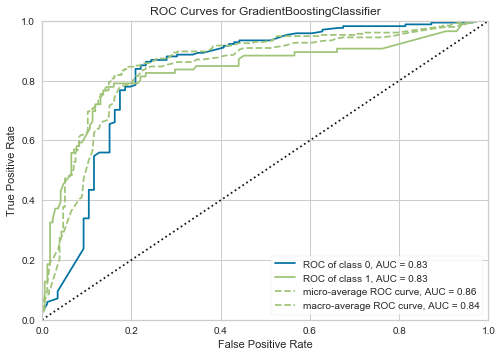

In [48]:
plot_model(tuned_gbc, plot = 'auc')

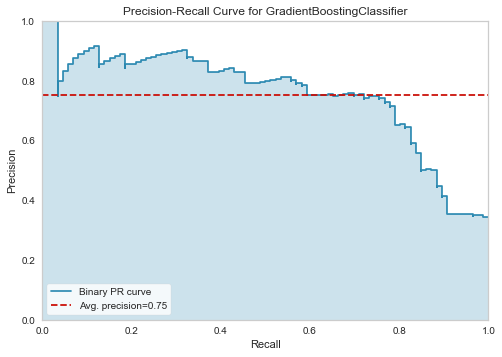

In [49]:
plot_model(tuned_gbc, plot = 'pr')

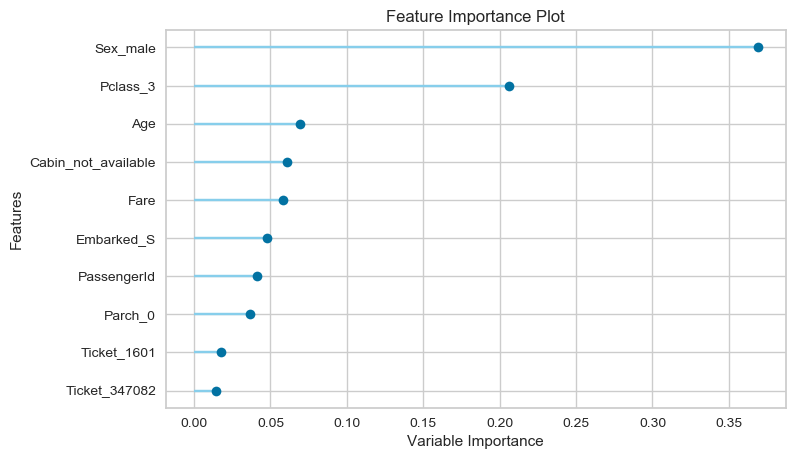

In [50]:
plot_model(tuned_gbc, plot='feature')

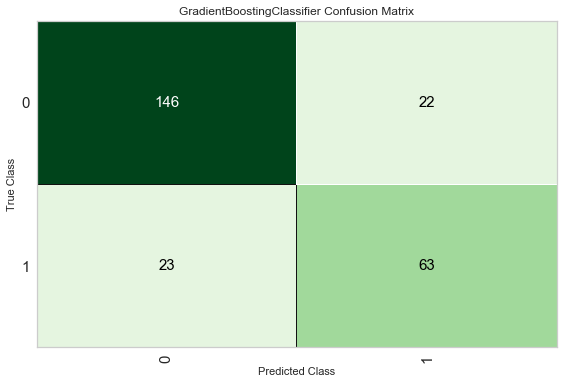

In [51]:
plot_model(tuned_gbc, plot = 'confusion_matrix')

In [52]:
evaluate_model(tuned_gbc)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [55]:
final_gbc = finalize_model(tuned_gbc)

In [57]:
#Final GradientBoostingClassifier model parameters for deployment
print(final_gbc)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.4, loss='deviance', max_depth=7,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.3, min_impurity_split=None,
                           min_samples_leaf=4, min_samples_split=10,
                           min_weight_fraction_leaf=0.0, n_estimators=190,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=0.7, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [58]:
predict_model(final_gbc);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8307,0.8718,0.7442,0.7529,0.7485,0.6209,0.6210


In [59]:
unseen_predictions = predict_model(final_gbc, data=data_unseen)
unseen_predictions.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Label,Score
0,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0,0.7499
1,49,0,3,"Samaan, Mr. Youssef",male,NaN,2,0,2662,21.6792,NaN,C,0,0.7993
2,123,0,2,"Nasser, Mr. Nicholas",male,32.5,1,0,237736,30.0708,NaN,C,0,0.6379
3,133,0,3,"Robins, Mrs. Alexander A (Grace Charity Laury)",female,47.0,1,0,A/5. 3337,14.5000,NaN,S,0,0.6181
4,177,0,3,"Lefebre, Master. Henry Forbes",male,NaN,3,1,4133,25.4667,NaN,S,0,0.9353


In [61]:
from pycaret.utils import check_metric
check_metric(unseen_predictions['Survived'], unseen_predictions['Label'], metric = 'Accuracy')

0.9333

In [62]:
save_model(final_gbc,'Final RF Model 05052021 - Gradient Boosting Classifier')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Survived',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_str...
                                             learning_rate=0.4, loss='deviance',
                                             max_depth=7, max_features='sqrt',
                                             max_leaf_nodes=None,
                                             min

In [63]:
saved_final_gbc = load_model('Final RF Model 05052021 - Gradient Boosting Classifier')

Transformation Pipeline and Model Successfully Loaded


In [64]:
new_prediction = predict_model(saved_final_gbc, data=data_unseen)

In [40]:
new_prediction.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Label,Score
0,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0,0.8988
1,49,0,3,"Samaan, Mr. Youssef",male,NaN,2,0,2662,21.6792,NaN,C,0,0.8077
2,123,0,2,"Nasser, Mr. Nicholas",male,32.5,1,0,237736,30.0708,NaN,C,0,0.8077
3,133,0,3,"Robins, Mrs. Alexander A (Grace Charity Laury)",female,47.0,1,0,A/5. 3337,14.5000,NaN,S,0,0.6216
4,177,0,3,"Lefebre, Master. Henry Forbes",male,NaN,3,1,4133,25.4667,NaN,S,0,0.8988


In [65]:
from pycaret.utils import check_metric
check_metric(new_prediction['Survived'], new_prediction['Label'], metric = 'Accuracy')

0.9333